# COGS 108 Final Project - Group 145

Team Members:

Thalal Cassim - A14003195

Kevin Chen - A12611200

Yongji(Jimmy) Shen - A14412968

Ansuman Somasundaram - A13909986

Wei Zeng - A13487193

# Introduction and Background
Suicide is the act of intentionally causing one's own death. Approximately 0.5% of people die by suicide. In a given year, this is roughly 12 per 100,00 people. [1] While there are clear risk factors that could potentially lead to attempted suicide, such as previous attempts to self harm, substance misuse, childhood trauma, and mental illness, we decided to look deeper into the difference in suicide rates across broader factors such as age, gender, GDP, and HDI. We hope to better understand broader environmental and physical factors, and if they affect suicide rates in different areas. The purpose of this project is purely to see if factors like GDP, age, and gender affect suicide rates, and make people aware of it. While we will not attempt to propose any solutions, we want to make others aware of potential factors like GDP, which is typically strongly correlated to quality of life, that can affect suicide rates. We will be focusing on the divide between developing and developed countries, and we suspect that more developed countries - where there may be a more prominent divide between classes, more pressure to be successful, and more pressure to compare and to be compared to others - will have higher suicide rates.

References:

[1] Suicide. Wikipedia, Wikimedia Foundation, 10 June 2019, en.wikipedia.org/wiki/Suicide.

## Research Question
How do gender, age, GDP, and HDI affect suicide rate?

Do developing countries have significantly different suicide rates compared to developed countries?

## Hypothesis
We predict that the suicide rate will be higher in developed nations that developing nations. We predict that the higher the GDP and HDI, the higher the suicide rate.

# Data Description
This compiled dataset from Kaggle is pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally across the socio-economic spectrum. The variables that interest us are gender, age, GDP, and HDI. The data we used for our project is from 2015 and 2016.

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import patsy
import statsmodels.api as sm
%matplotlib inline

In [2]:
# read from data set
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

### Data Cleaning & Pre-processing

First, we created four different dataframes according to sex, age, GDP and HDI, then we selected some developed countries and some developing countries from our dataset and created other four different dataframes accroding to sex, age, GDP and HDI. <br>
(HDI stands for Human Development Index, the first year of country start to count HDI are different, so we have to drop all the years which do not have HDI in order to analyze our dataset)

In [3]:
#select data from those following countries from our data set
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
tmp = list()   
for i in (suicide.index):
    for country in selected:
        if suicide.loc[i,"country"]==country:
            tmp.append(suicide.loc[i].tolist())
df = pd.DataFrame(columns = suicide.columns)
for i in tmp:
    df = df.append(pd.Series(i, index=suicide.columns), ignore_index=True)

In [4]:
# Cleaning the Nan data on table
suicideHDI = suicide.dropna()
dfHDI = df.dropna()

In [5]:
#sex,age,dgc,and hdi for all countries
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [6]:
#sex,age,dgc,and hdi for selected countries 
#("Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa")
df_sex = df[['country','year','age','sex','suicides_no','population']]
df_age = df[['country','year','age','suicides_no','population']]
df_gdp = df[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
df_hdi = dfHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

### Data Visualization

##### Seaborn Config

In [7]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

#### Sex vs Suicide Rates

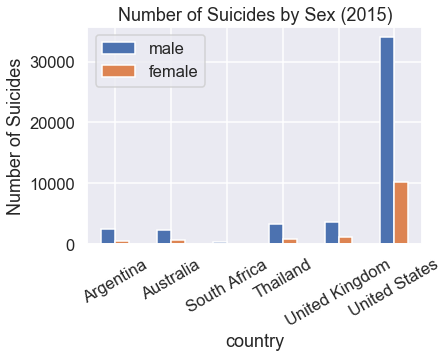

In [8]:
# Sex vs Suicide Rates in 2015
df_sex_2015 = df_sex[df_sex['year'] == 2015]
male = df_sex_2015[df_sex_2015['sex']=='male']
female = df_sex_2015[df_sex_2015['sex']=='female']

male_country = dict()
female_country = dict()
# Counting the amount of suicides for male and female
for i in male.index:
    for country in selected:
        if male.loc[i,"country"]==country:
            if country in male_country:
                male_country[country]+=male.loc[i,'suicides_no']
            else:
                male_country[country]=male.loc[i,'suicides_no']
for i in female.index:
    for country in selected:
        if female.loc[i,"country"]==country:
            if country in female_country:
                female_country[country]+=female.loc[i,'suicides_no']
            else:
                female_country[country]=female.loc[i,'suicides_no']

country = list()
male_count = list()
female_count = list()
for i in male_country:
    country.append(i)
    male_count.append(male_country[i])
    female_count.append(female_country[i])
    
# Create a new dataframe to store all above data
d = {'country': country, 'male': male_count,'female':female_count}
sex = pd.DataFrame(data=d)
sex.plot.bar(x = 'country',rot=30)
plt.ylabel("Number of Suicides")
plt.title("Number of Suicides by Sex (2015)")
f1 = plt.gcf()

##### - Interpretation of Number of Suicides by Sex (2015)
Number of Suicides by Sex (2015) shows the amount of suicides by gender across our selected countries in 2015. This graph indicates that there are typically more male suicides female suicides in a single year in these countries.

#### Sex and Age vs Suicide Rates

(0, 700)

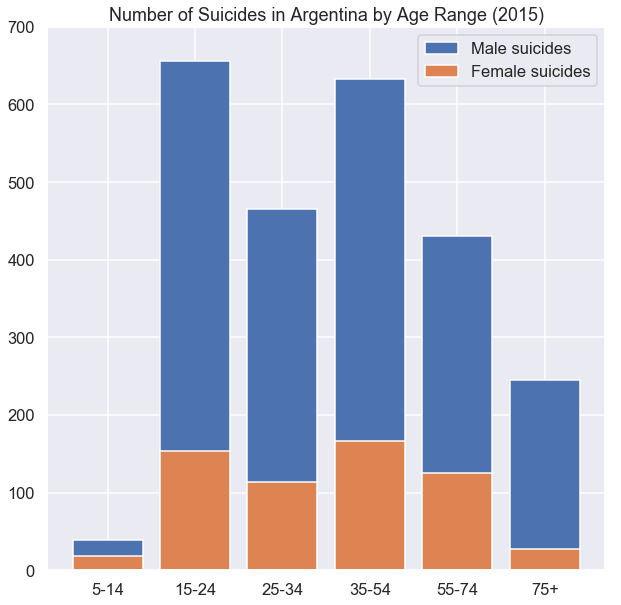

In [9]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]
df_sex_argentina = df_sex_2015[df_sex_2015['country'] == 'Argentina']

count_male_a = 0
count_male_b = 0
count_male_c = 0
count_male_d = 0
count_male_e = 0
count_male_f = 0

#df_sex
df_male_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'male']

for index, row in df_male_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_male_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_male_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_male_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_male_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_male_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_male_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_male_a, "count 15-24:", count_male_b, "count 25-34:", count_male_c, "count 35-54:", count_male_d, "count 55_74:", count_male_e, "count 75+:", count_male_f)

m_count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_male_a, count_male_b, count_male_c, count_male_d, count_male_e, count_male_f]} 
m_counts = pd.DataFrame(m_count_dict)

count_female_a = 0
count_female_b = 0
count_female_c = 0
count_female_d = 0
count_female_e = 0
count_female_f = 0

#df_sex
df_female_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'female']

for index, row in df_female_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_female_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_female_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_female_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_female_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_female_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_female_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_female_a, "count 15-24:", count_female_b, "count 25-34:", count_female_c, "count 35-54:", count_female_d, "count 55_74:", count_female_e, "count 75+:", count_female_f)

fem_count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_female_a, count_female_b, count_female_c, count_female_d, count_female_e, count_female_f]} 
fem_counts = pd.DataFrame(fem_count_dict)
plt.figure(figsize = (10, 10))
plt.bar(m_counts.Group, height = m_counts.Count, label = 'Male suicides')
plt.bar(fem_counts.Group, height = fem_counts.Count, label = 'Female suicides')
plt.legend(loc = 'upper right')
plt.title("Number of Suicides in Argentina by Age Range (2015)")
plt.ylim(0, 700)

##### - Interpretation of Number of Suicides in Argentina by Age Range (2015)
Number of Suicides in Argentina by Age Range (2015) shows the number of suicides by each gender by their ages in Argentina in 2015. This graph indicates that there were more male suicides than female suicides in Argentina in 2015 and that people in the age ranges of 15 - 24 and 35 - 54 made up the majority of suicides.

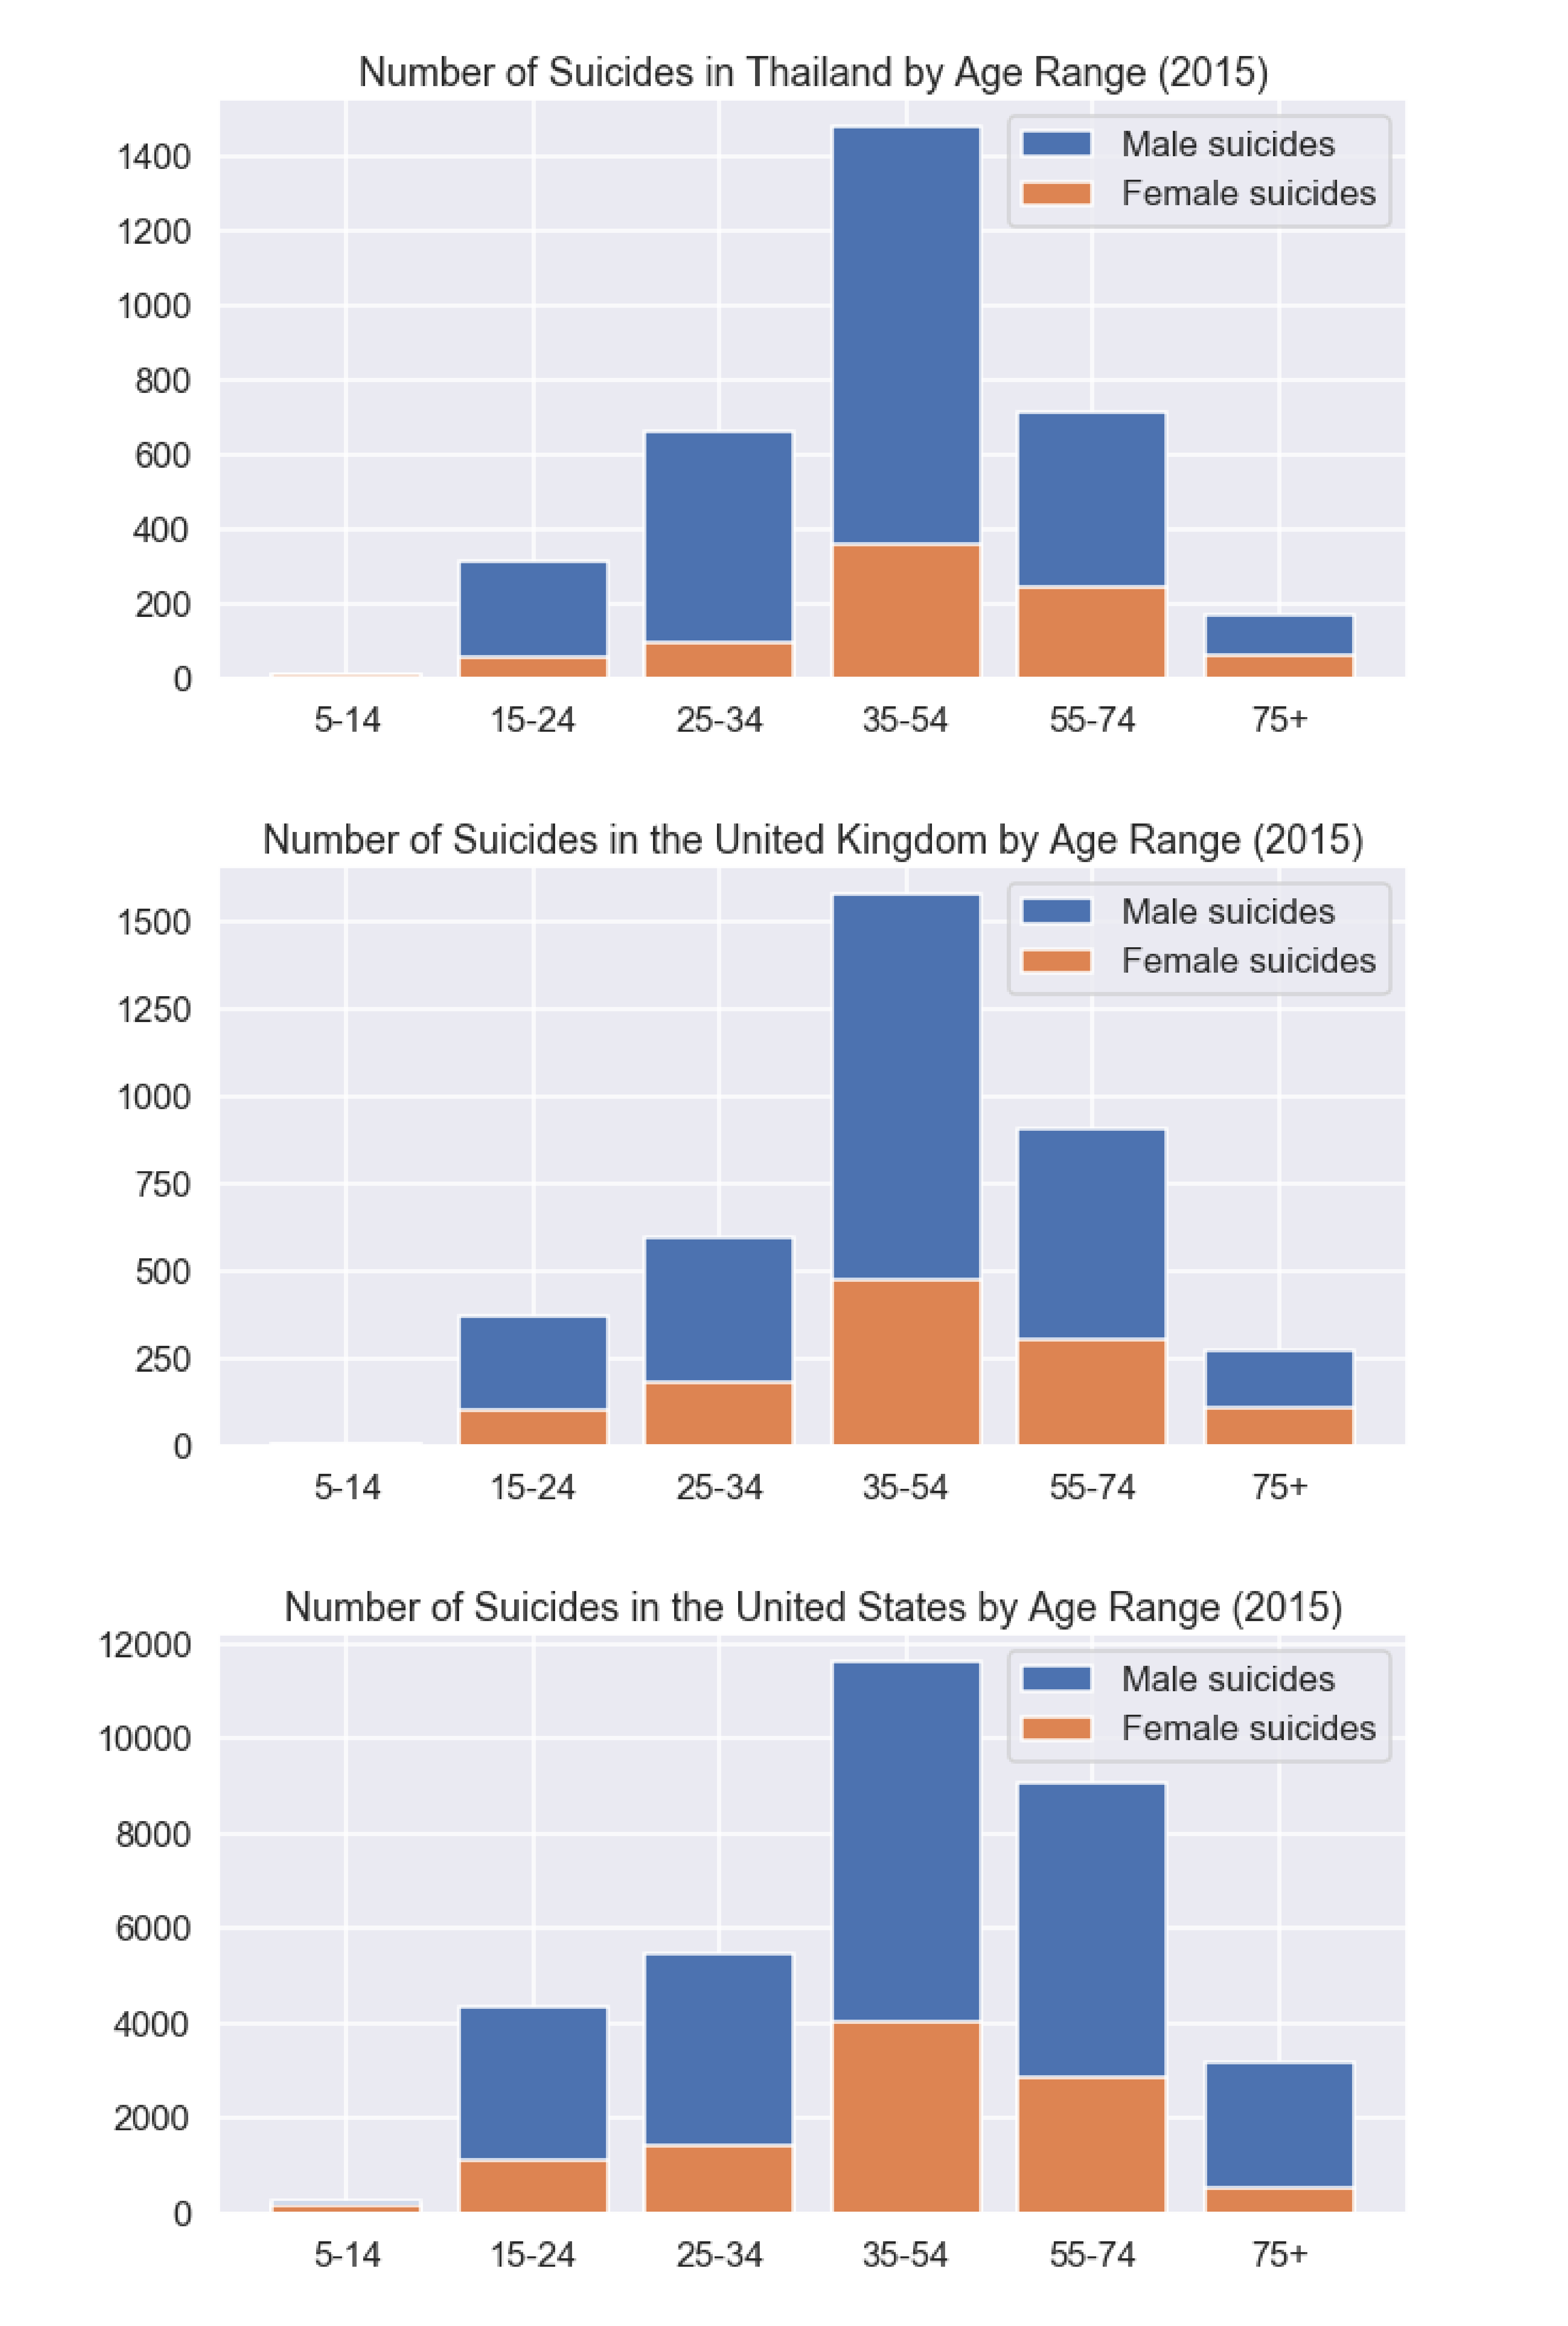

In [22]:
plt.imshow(plt.imread('./Visualizations/CompositeAgeRange.png'))
plt.axis('off')
plt.rcParams['figure.figsize'] = [160, 90]
plt.show()

##### Interpretation of Number of Suicides in other countries by Age Range (2015)
The previous charts follow up on the chart showing Argentina's suicides by age range to check if there are similar patterns in other countries. In the United States, United Kingdom, and Thailand the group with the highest number of suicides in 2015 was 35-54, indicating that Argentina might be a special case with a different group having more suicides. There may be factors other than age range at play in certain countries.

#### GDP vs Suicide Rate

Text(0.5,1,'Log 10 transform of GDP in 2015')

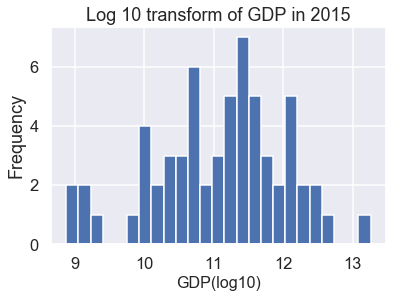

In [11]:
# GDP vs Suicide Rate in 2015
suicide_gdp = suicide_gdp[suicide_gdp.year == 2015]
tmp1 = suicide_gdp['country'].unique()
result1 = dict()
for i in tmp1:
    result1[i] = 0
result2 = dict()
for i in tmp1:
    result2[i] = 0
# count the amount of ratio and gdp in 2015 for different countries
for i in suicide_gdp.index:
    country = suicide_gdp.loc[i,"country"]
    ratio = suicide_gdp.loc[i,'suicides/100k pop']
    gdp = suicide_gdp.loc[i,' gdp_for_year ($) ']
    result1[country]+= ratio
    result2[country] = gdp
    
country=list()
ratiolist = list()
gdplist = list()
for i in tmp1:
    ratio = result1[i]
    gdp = result2[i]
    country.append(i)
    ratiolist.append(int(ratio))
    gdp = gdp.replace(',','')
    gdplist.append(math.log10(int(gdp)))
    
# Create a new dataframe to store all above data
data= dict()
data = {"country":country,"ratio":ratiolist,"gdp":gdplist}
df1 = pd.DataFrame(data)
df1=df1.set_index("country")
df1['gdp'].plot('hist', bins = 25)
plt.xlabel('GDP(log10)', fontsize=16)
f2 = plt.gcf()
plt.title("Log 10 transform of GDP in 2015")

#### - Interpretation of Log 10 transform of GDP in 2015
We used a Log 10 transform of GDP in 2015 to normalize the different GDPs.

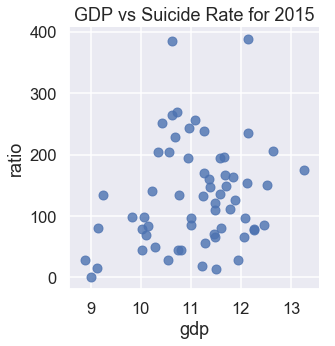

In [12]:
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);
plt.title('GDP vs Suicide Rate for 2015')
f4 = plt.gcf()

#### Interpretation of GDP vs Suicide Rate for 2015
GDP vs Suicide Rate for 2015 is a scatter plot of gdp vs suicides/100k.

Text(0.5,1,'Log 10 transform of HDI in 2014')

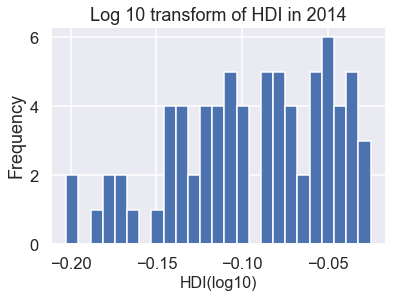

In [13]:
#HDI vs Suicide Rate for 2014
suicide_hdi = suicide_hdi[suicide_hdi.year == 2014]
#print(suicide_hdi)
tmp1 = suicide_hdi['country'].unique()
result3 = dict()
for i in tmp1:
    result3[i] = 0

result4 = dict()
for i in tmp1:
    result4[i] = 0
# count the amount of ratio and hdi in 2015 for different countries
for i in suicide_hdi.index:
    country = suicide_hdi.loc[i,"country"]
    ratio = suicide_hdi.loc[i,'suicides/100k pop']
    hdi = suicide_hdi.loc[i,'HDI for year']
    result3[country]+= ratio
    result4[country] = hdi
country=list()
ratiolist2 = list()
hdilist = list()

import math
for i in tmp1:
    ratio = result3[i]
    hdi = result4[i]
    country.append(i)
    ratiolist2.append(int(ratio))
    hdilist.append(math.log10(float(hdi)))
    
# Create a new dataframe to store all above data
data= dict()
data = {"country":country,"ratio":ratiolist2,"hdi":hdilist}
df2 = pd.DataFrame(data)
df2=df2.set_index("country")
df2['hdi'].plot('hist', bins = 25)
plt.xlabel('HDI(log10)', fontsize=16)
f3 = plt.gcf()
plt.title("Log 10 transform of HDI in 2014")

#### - Interpretation of Log 10 transform of HDI in 2014
We used a Log 10 transform of HDI in 2014 to normalize the different HDIs.

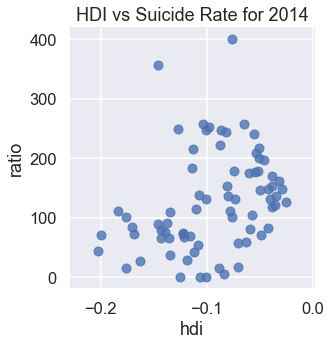

In [14]:
sns.lmplot(x='hdi', y='ratio', data=df2,fit_reg=False);
plt.title('HDI vs Suicide Rate for 2014')
f5 = plt.gcf()

#### Interpretation of HDI vs Suicide Rate for 2014
HDI vs Suicide Rate for 2014 is a scatter plot of HDI vs the number of suicides/100k.

### Data Analysis & Results

Now that we have a general idea on how age, sex, GDP and HDI might correlate with the suicide ratio via looking at the visualization from above, we could start doing some analysis on these data.

#### Age vs Suicide

In the visualization section, we have a chart that displays the number of suicides in Argentina by Age Range in 2015 that let us see two factors within in graph. Now, in order to examination the single factor 'AGE', we re-wrangle the data to create a new dataframe for displaying the effect of age on suicide.

Text(0,0.5,'Suicide No.')

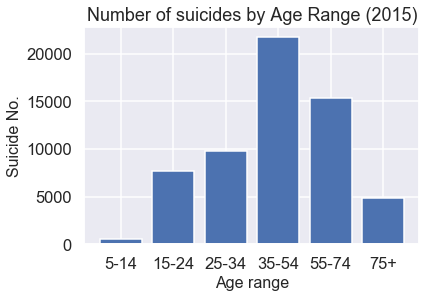

In [15]:
# Age vs Suicide
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]

# Initialize count variables to count suicide number for each range
count_a = 0
count_b = 0
count_c = 0
count_d = 0
count_e = 0
count_f = 0

# Loop through the rows to sum up all suicide numbers for each range
for index, row in df_sex_2015.iterrows():
    if(row['age'] == '75+ years'):
        count_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_a += row['suicides_no']
    else:
        print("fail to find age within range!")

# Create a dict and match ranges with their counts accordingly
count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_a, count_b, count_c, count_d, count_e, count_f]} 

# Create the df with the dict
counts = pd.DataFrame(count_dict)

# Plot a bar chart to display the data
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of suicides by Age Range (2015)")
plt.xlabel("Age range", fontsize = 16)
plt.ylabel("Suicide No.", fontsize = 16)

This graph shows us that people between the age of 35 and 54 commit suicide more than any other age group, even when we account for Argentina.

#### Sex vs Suicide Rate

Recall that we have the chart of the number of Suicides by Sex in 2015 back in the Data Visualization section.

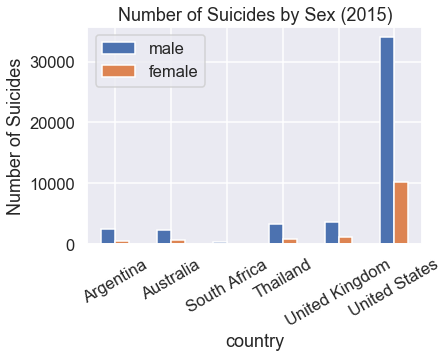

In [16]:
# Recalling the variable storing the chart
f1

In this graph that shows us the distribution of suicide numbers for selected countries grouped by sex, it is obvious for us to see that in all 6 of our selected countries males have much higher suicide numbers than females (approximately 4 times the number of female in the United States). Therefore, we could conclude that sex is indeed a significant factor that affects whether or not someone is likely to commit suicide or not. We can also conclude that sex influences suicide rate, since populations with more males have more suicides.

Now that we are done with analysing the nominal and ordinal data factors, let's take a look at the ratio data factors GDP and HDI.

#### OLS Regression Model For GDP vs Suicide Rate per 100K aka Ratio

In order to further examine the effect of GDP on Suicide Rate, we created a linear OLS model to predict suicide rate from GDP (reminder that "suicide rate" and "ratio" are suicides/100k). 

In [17]:
# Use patsy.dmatrices to create the design matrices, calling the outputs outcome_1, predictors_1.
outcome_1, predictors_1 = patsy.dmatrices('ratio ~ gdp', df1)

# Create an OLS model (sm.OLS) using outcome_1 and predictors_1
mod_1 = sm.OLS(outcome_1, predictors_1)
type(mod_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.173
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0799
Time:                        22:16:04   Log-Likelihood:                -361.65
No. Observations:                  62   AIC:                             727.3
Df Residuals:                      60   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.4529    125.705     -0.720      0.4

Here we successfully get the OLS Regression Results and see a linear prediction line with a coefficient of 20.1154 and an intercept of -90.4529, producing the linear equation y = 20.1154 * x - 90.4529. Let's plot the line on our existing scatter plot to see how GDP and Suicide Rate relate to each other.

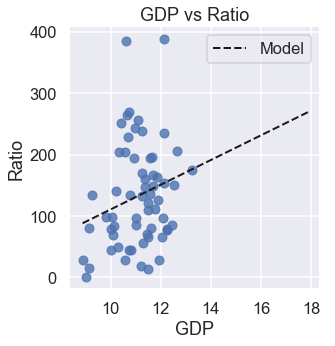

In [18]:
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);

# GDP max is increased by 5 so our line goes out past existing data points
x = np.arange(df1['gdp'].min(), df1['gdp'].max() + 5)

# Creating the graph
y = 20.1154 * x - 90.4529
plt.plot(x, y, '--k', linewidth=2, label='Model')
plt.title('GDP vs Ratio')
plt.xlabel('GDP')
plt.ylabel('Ratio')
plt.legend()

#### Important statistics & Analysis:
#### R-squared: 0.050,
   The r-squared is really close to 0%,  which indicates that the real data points are generally far away from our regression model prediction line. Predictions are very likely to be unprecise.  
#### P > |t|: 0.080,
   The p value of the test ended up being 0.080 which is larger than the common alpha level 0.05. Therefore, we will drop gdp from our discussion on suicide rate since the data did not end up being statistically significant.
#### The Graph
   The prediction line, as we mentioned above within the R-squared section, could not predict the data precisely.

#### OLS Regression Model For HDI vs Suicide Rate per 100K aka Ratio

Now let's see if how developed a country is could affect is Suicide Rate. For this we will use HDI to measure how "developed" a country is and compare it to Suicide Rates to see if there is an effect.

In [19]:
# Use patsy.dmatrices to create the design matrices, calling the outputs outcome_2, predictors_2.
outcome_2, predictors_2 = patsy.dmatrices('ratio ~ hdi', df2)
# Create an OLS model (sm.OLS) using outcome_1 and predictors_1
mod_2 = sm.OLS(outcome_2, predictors_2)
type(mod_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     7.801
Date:                Tue, 11 Jun 2019   Prob (F-statistic):            0.00666
Time:                        22:16:04   Log-Likelihood:                -433.64
No. Observations:                  75   AIC:                             871.3
Df Residuals:                      73   BIC:                             875.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.4883     21.460      8.457      0.0

Now we successfully get the OLS Regression Results and see a linear prediction line with a coefficient of 572.7162 and an intercept of 181.4883, producing this linear equation y = 572.7162 * x + 181.4883. Let's plot the linear on our existed scatter plot to see how they relat to each other.

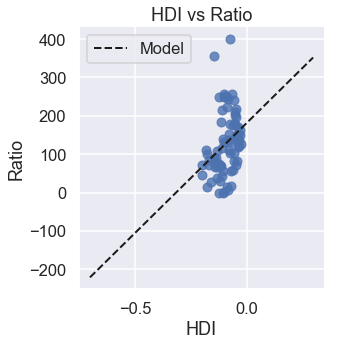

In [20]:
sns.lmplot(x='hdi', y='ratio', data=df2, fit_reg=False);
#the year max is increased by so our line goes out past existing data points
x = np.arange(df2['hdi'].min() - 0.5, df2['hdi'].max() + 0.5)

#This part is creating the graph
y = 572.7162 * x + 181.4883
plt.plot(x, y, '--k', linewidth=2, label='Model')
plt.title('HDI vs Ratio')
plt.xlabel('HDI')
plt.ylabel('Ratio')
plt.legend()

#### Important statistics & Analysis:
#### R-squared: 0.097
   The r-squared is really close to 0%,  which indicates that the real data points are generally far away from our regression model prediction line. Predictions are very likely to be unprecise. .  
#### P > |t|: 0.007
   The p value of the test ended up being 0.0007, which is smaller than the common alpha level 0.05. Therefore, we should consider HDI as a possible factor that might affect suicide rates.
   However, since the r-squared, again, is close to 0%, we will not get precise predictions of suicide rate from HDI with an OLS model.
#### The Graph
   The precision of the prediction is limited.

# Privacy & Ethics Considerations
Suicide is generally considered a taboo subject. Not many people feel comfortable talking about suicide, so it is not rare for people to question whether a study like this is ethical in the first place. Collecting data for a study like this could be skewed because people don’t want to talk about it, and the collection of data in developing nations may not be as accurate as that of the developed nations. Since discussing the topic is generally frowned upon, particularly in developing nations, families may not like the fact that one of their loved ones that who committed suicide passed has been reduced to a number in a dataset, even though it has only been used to bring awareness to an issue that plagues the entire world.

# Conclusion & Discussion
We ultimately concluded that gender and age affect suicide rates. In a given year, more males commit suicide than females, and people between the ages of 35-54 have the higehst suicide rate. We found this to be the case in most countries except in Argentina, where the 15-24 age group had a slightly higher number of suicides in 2015. From looking at the aggregate data, we ultimately concluded that this was an outlier.

While GDP and HDI were not clear indicators of suicide rates, people in the US had a significantly higher suicide rate than any other nation. While GDP is not a good predictor of suicide rate, HDI is much better. Neither are very precise in their predictions. The biggest limitation of this study was the questionable ability of developing nations to collect data, and whether the data is accurate, since developing nations tend to frown upon suicide, and may not have the infrastructure in place to collect the data precisely or may omit data altogether.